#### Analysing the first lot of simulation that were run on AWS (01/03/2021).

#### TODO 06/03/21:
- rerun single simulations with new data collector
- check offset distributions
- modify timeline flexibility functionality accordingly...
- check other outputs
- write network data collector 
- check and write other required data collectors


#### FURTHER TODO:

- ~~Prevent zero probabilites: if optimsation fails, use smart guess.~~
- ~~Add data collector method for project start times and offsets.~~
- ~~Run diagnostic simulations x 2 without budgetary constraint (test no nulls w/o budget, test no zero probs after above change,~~test offset distributions - as expected?) - still gettings NULL and zero probs. Looking in mesa server sims: random team allocation is producing null teams because select_Team is returning teams that exceed budget. Basin is also producing teams that exceed budget!! Shit...  

DO: remove diagnostic print (null project) statements from org.py. Rerun diagnostic simulations in c6g w/o budget constraint. Make smart_guess and smart_step respect constraints. Replace solver output with initial guess if sum(x)==0. Check and remove assert test_constraints statement in opti.py


- (Do niter=0 in parallel)
- ~~Make smart_guess respect budget constraints~~
- ~~Confirm that smart_step is respecting budget constraint~~
- Write unit tests for optimiser (e.g. confirm all constraints are respected)
- ~~Add data collector method for budgets:~~ Plot distribution of budgets (relative).
- Add any further data collectors required for testing hypotheses (e.g. save network)
- Run simulations x 3 (with budgetary constraint)

Questions:
- Is the budget shown in the scatter plot the 'flexed' budget?
- Is budget copied across (incuding flex) when using predefined projects?
- Does a 1000 worker simulation take 56 hours on my new computer?!

In [17]:
#DATA_DIR = '../simulation_io/single_runs_010321/'
#DATA_DIR = '../simulation_io/diagnostics_020321/'
#DATA_DIR = '../simulation_io/single_runs_040321/'
DATA_DIR = '../simulation_io/diagnostics_060321/'

In [18]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
with open(DATA_DIR + 'random_all_in/tracked_projects_wc_100_np_2_ts_100.pickle', 'rb') as ifile:
    random = pickle.load(ifile)
    
with open(DATA_DIR + 'basin_w_timeline_flex/tracked_projects_wc_100_np_2_ts_10.pickle', 'rb') as ifile:
    basin_w_flex = pickle.load(ifile)
    
with open(DATA_DIR + 'basin_wo_timeline_flex/tracked_projects_wc_100_np_2_ts_10.pickle', 'rb') as ifile:
    basin_wo_flex = pickle.load(ifile)    

In [22]:
random

,project_id,prob,risk,budget,null,success,maximum_offset,realised_offset,start_time,team_budget,team_ovr,team_creativity_match
0,0,0.000000,25,98.00,False,False,0,0,0,45.297157,32.355112,22.515966
1,1,0.000000,25,30.00,False,False,0,0,0,26.306742,43.844570,31.439368
2,3,0.019371,5,71.00,False,False,0,0,1,60.578198,48.462558,1.393192
3,2,0.044394,10,56.00,False,False,0,0,1,30.442610,32.044852,0.523385
4,5,0.593297,5,52.00,False,False,0,0,2,39.328768,65.547947,0.023923
...,...,...,...,...,...,...,...,...,...,...,...,...
189,183,0.365464,5,103.75,False,False,3,3,94,46.710466,38.925388,0.022720
190,189,0.000000,5,55.00,False,False,0,0,94,25.739933,30.282274,2.946970
191,197,0.000000,5,38.00,True,False,0,0,98,NaN,NaN,NaN
192,190,0.020103,25,45.00,False,False,0,0,95,31.153861,56.643383,1.215305


(array([148.,   0.,   0.,  20.,   0.,   0.,  16.,   0.,   0.,  10.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

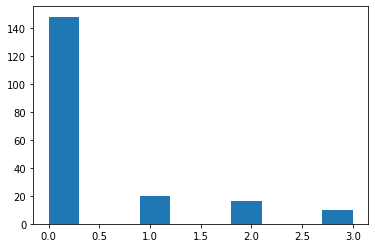

In [23]:
plt.hist(random.realised_offset)

In [25]:
assert all(random.realised_offset == random.maximum_offset)

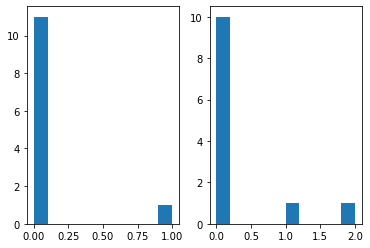

In [27]:
plt.subplot(1,2,1)
plt.hist(basin_w_flex.realised_offset)
plt.subplot(1,2,2)
plt.hist(basin_w_flex.maximum_offset);

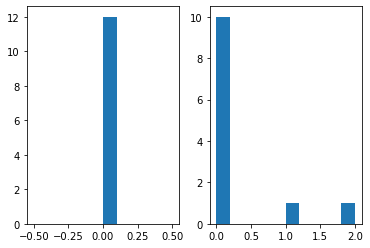

In [28]:
plt.subplot(1,2,1)
plt.hist(basin_wo_flex.realised_offset)
plt.subplot(1,2,2)
plt.hist(basin_wo_flex.maximum_offset);

In [29]:
for i in range(1):
    print (i)

0


In [5]:
print("Fraction of null projects.")
print("Random: ", np.round(sum(random.null) / len(random), 2))
print("Basin with timeline flex: ", np.round(sum(basin_w_flex.null) / len(basin_w_flex), 2))
print("Basin without timeline flex: ", np.round(sum(basin_wo_flex.null) / len(basin_wo_flex), 2))

Fraction of null projects.
Random:  0.14
Basin with timeline flex:  0.0
Basin without timeline flex:  0.0


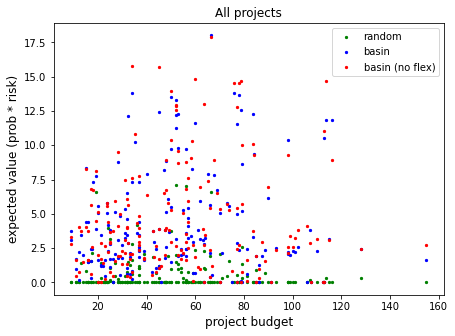

In [6]:
fs = 12
ps = 5
plt.figure(figsize=(7,5))
plt.scatter(random.budget,
            random.prob * random.risk,
            label='random', color='green', s=ps)

plt.scatter(basin_w_flex.budget,
            basin_w_flex.prob * basin_w_flex.risk,
            label='basin', color='blue', s=ps)

plt.scatter(basin_wo_flex.budget,
            basin_wo_flex.prob * basin_wo_flex.risk,
            label='basin (no flex)', color='red', s=ps)

plt.xlabel("project budget", fontsize=fs)
plt.ylabel("expected value (prob * risk)", fontsize=fs)
plt.title("All projects")
plt.legend();

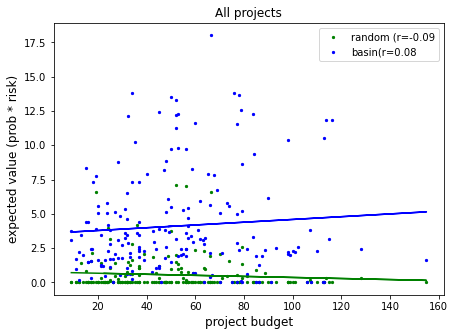

In [16]:
from scipy.stats import linregress

fs = 12
ps = 5


plt.figure(figsize=(7,5))
x = random.budget
y = random.prob * random.risk
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.scatter(x,
            y,
            label='random (r=%.2f' % r_value, color='green', s=ps)
plt.plot(x, x*slope + intercept, color='green')

x = basin_w_flex.budget
y = basin_w_flex.prob * basin_w_flex.risk
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.scatter(x,
            y,
            label='basin(r=%.2f' % r_value, color='blue', s=ps)
plt.plot(x, x*slope + intercept, color='blue')

plt.xlabel("project budget", fontsize=fs)
plt.ylabel("expected value (prob * risk)", fontsize=fs)
plt.title("All projects")
plt.legend();

In [8]:
random = random.loc[~random.null]
basin_w_flex = basin_w_flex.loc[~basin_w_flex.null]
basin_wo_flex = basin_wo_flex.loc[~basin_wo_flex.null]

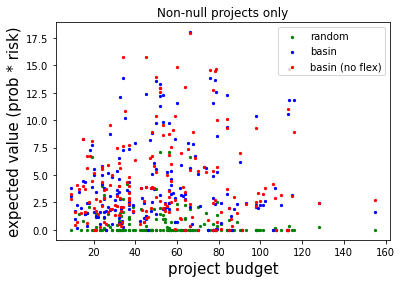

In [9]:
fs = 15
ps = 5
plt.scatter(random.budget,
            random.prob * random.risk,
            label='random', color='green', s=ps)

plt.scatter(basin_w_flex.budget,
            basin_w_flex.prob * basin_w_flex.risk,
            label='basin', color='blue', s=ps)

plt.scatter(basin_wo_flex.budget,
            basin_wo_flex.prob * basin_wo_flex.risk,
            label='basin (no flex)', color='red', s=ps)

plt.xlabel("project budget", fontsize=fs)
plt.ylabel("expected value (prob * risk)", fontsize=fs)
plt.title("Non-null projects only")
plt.legend();

In [10]:
print("Mean probability of success.")
print("Random: ", np.round(np.mean(random.prob), 2))
print("Basin with timeline flex: ", np.round(np.mean(basin_w_flex.prob), 2))
print("Basin without timeline flex: ", np.round(np.mean(basin_wo_flex.prob), 2))

Mean probability of success.
Random:  0.07
Basin with timeline flex:  0.36
Basin without timeline flex:  0.38


In [11]:
print("Fraction of successful projects.")
print("Random: ", np.round(sum(random.success) / len(random), 2))
print("Basin with timeline flex: ", np.round(sum(basin_w_flex.success) / len(basin_w_flex), 2))
print("Basin without timeline flex: ", np.round(sum(basin_wo_flex.success) / len(basin_wo_flex), 2))

Fraction of successful projects.
Random:  0.07
Basin with timeline flex:  0.32
Basin without timeline flex:  0.42


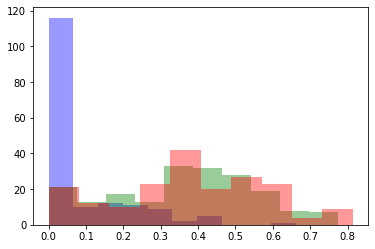

In [12]:
plt.hist(random.prob, alpha=0.4, color='blue')
plt.hist(basin_w_flex.prob, alpha=0.4, color='green')
plt.hist(basin_wo_flex.prob, alpha=0.4, color='red');

In [15]:
import random

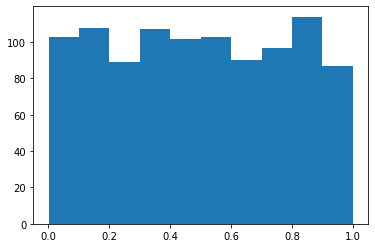

In [16]:
plt.hist([random.uniform(0.0, 1.0) for r in range(1000)]);